In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df1 = pd.read_csv("aau1043_dnm.tsv")
df2 = pd.read_csv("aau1043_parental_age.tsv")
df2

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
5,2280,38,20
6,3190,35,25
7,3212,23,19
8,3450,25,22
9,3578,23,20


In [21]:
tot_dnm = df1['Proband_id'].value_counts().rename_axis('Proband_id').to_frame('tot_dnm')

# separate paternal
roi1 = df1["Phase_combined"] == "father"
df_paternal = df1.loc[roi1, :]
pat_dnm = df_paternal['Proband_id'].value_counts().rename_axis('Proband_id').to_frame('pat_dnm')

# separate maternal 
roi2 = df1["Phase_combined"] == "mother"
df_maternal = df1.loc[roi2, :]
mat_dnm = df_maternal['Proband_id'].value_counts().rename_axis('Proband_id').to_frame('mat_dnm')

de_novo_df = pd.merge(pat_dnm,mat_dnm, on = 'Proband_id')
de_novo_df = pd.merge(de_novo_df,tot_dnm, on = 'Proband_id')
total_df = pd.merge(df2,de_novo_df,on = 'Proband_id')
total_df

,Proband_id,Father_age,Mother_age,pat_dnm,mat_dnm,tot_dnm
0,675,31,36,51,19,70
1,1097,19,19,26,12,39
2,1230,30,28,42,12,57
3,1481,32,20,53,14,68
4,1806,38,34,61,11,78
5,2280,38,20,63,9,75
6,3190,35,25,40,11,52
7,3212,23,19,43,7,52
8,3450,25,22,42,11,56
9,3578,23,20,36,5,42


Text(0, 0.5, 'Number De Novo Mutations')

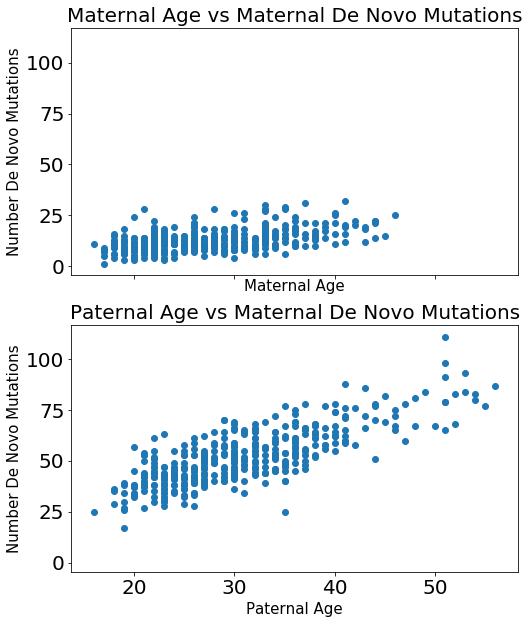

In [47]:
fig, ax = plt.subplots(nrows = 2, sharex = True,sharey = True,figsize = (8,10))
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
ax[0].scatter(total_df['Mother_age'],total_df['mat_dnm'])
ax[0].set_title("Maternal Age vs Maternal De Novo Mutations", fontsize = 20)
ax[0].set_xlabel("Maternal Age", fontsize = 15)
ax[0].set_ylabel("Number De Novo Mutations", fontsize = 15)
ax[1].scatter(total_df['Father_age'],total_df['pat_dnm'])
ax[1].set_title("Paternal Age vs Maternal De Novo Mutations", fontsize = 20)
ax[1].set_xlabel("Paternal Age", fontsize = 15)
ax[1].set_ylabel("Number De Novo Mutations", fontsize = 15)

In [62]:
model = smf.ols(formula = "mat_dnm ~ Mother_age ", data = total_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        14:06:51   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p value is less than 0.000. The relationship between maternal age and the numbe rof de novo mutations is significant. The effect size is 0.3776 mutations per one year increase in age.

In [51]:
model = smf.ols(formula = "pat_dnm  ~ Father_age ", data = total_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        13:49:00   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This relationship is significant as the p value is less than 0.05. The effect size is around 1.3538 de novo mutations per one year increase in father age

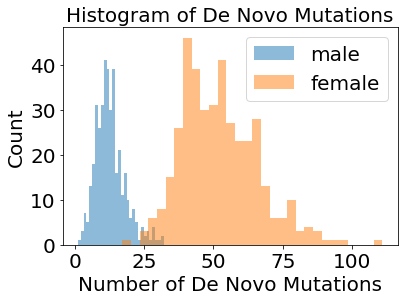

In [59]:
fig, ax = plt.subplots()
ax.hist(total_df["mat_dnm"], label = "male", bins = 30, alpha = 0.5)
ax.hist(total_df["pat_dnm"], label = "female", bins = 30, alpha = 0.5)
ax.set_title("Histogram of De Novo Mutations",fontsize = 20)
ax.set_xlabel("Number of De Novo Mutations",fontsize = 20)
ax.set_ylabel("Count",fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

In [60]:
stats.ttest_ind(total_df["pat_dnm"], total_df["mat_dnm"])

Ttest_indResult(statistic=53.403565287269245, pvalue=2.1986031793078793e-264)

In [65]:
model = smf.poisson(formula = "mat_dnm ~ Mother_age ", data = total_df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        14:08:13   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
                                        LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [71]:
model = smf.poisson(formula = "pat_dnm  ~ Father_age ", data = total_df)
results_pat = model.fit()
results_pat.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        14:22:03   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
                                        LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [68]:
model = smf.poisson(formula = "pat_dnm  ~ mat_dnm ", data = total_df)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 4.384364
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.05379
Time:                        14:09:17   Log-Likelihood:                -1736.2
converged:                       True   LL-Null:                       -1834.9
                                        LLR p-value:                 7.684e-45
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7100      0.019    199.212      0.000       3.674       3.747
mat_dnm        0.0185      0.001     14.260      0.000       0.016       0.021
==============================================================================
"""

In [72]:
results_pat.params

Intercept     3.190257
Father_age    0.024096
dtype: float64

In [73]:
import math
math.exp(3.190257+0.024096*50.5)

82.03163782612788

In [74]:
model = smf.ols(formula = "Mother_age  ~ Father_age ", data = total_df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mother_age   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     838.5
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.31e-99
Time:                        14:32:17   Log-Likelihood:                -1076.0
No. Observations:                 396   AIC:                             2156.
Df Residuals:                     394   BIC:                             2164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5044      0.739      8.805      0.000       5.052       7.957
Father_age     0.6726      0.023     28.956      0.000       0.627       0.718
==============================================================================
Omnibus:                        5.107   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                6.859
Skew:                          -0.028   Prob(JB):                       0.0324
Kurtosis:                       3.642   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Mother Age vs Father Age')

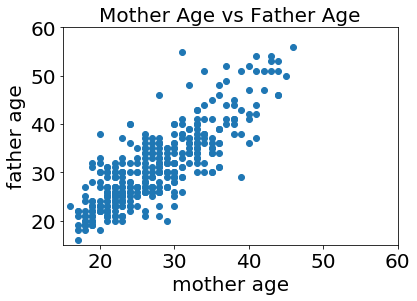

In [79]:
fig, ax = plt.subplots()
ax.scatter(x = total_df['Mother_age'], y = total_df['Father_age'])
ax.set_xlim(15,60)
ax.set_ylim(15,60)
ax.set_xlabel('mother age',fontsize = 20)
ax.set_ylabel('father age', fontsize = 20)
ax.set_title('Mother Age vs Father Age', fontsize = 20)